## COMP3670/6670 Programming Assignment 2 - Clustering and Vector Calculus
---

**Enter Your Student ID:*u7207311*

**Your Name:*Mustafa Mohammadi*
    
**Deadline:*23:59pm, September 13th, 2020.*

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'u7207311.ipynb'.

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

**Programming Section**:
- 1.1: 15%
- 1.2: 20%
- 2.1: 10%
- 2.2: 15%
- 2.3: 15%
- 2.4: 10%
- 2.5: 10%
- 2.6: 5%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.display import HTML

np.random.seed(1)


## Task1: Vector Calculus 
-----------
This part is about vector calculus. In this section, we will use the rigorous definition of the derivative to calculus it.
$$ f'(a) = \lim_{h \to 0}\dfrac{f(a + h) - f(a)}{h}$$
Now, expand it to vectors.

-----
**Task 1.1:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^T\textbf{a}$ respect to $\textbf{x}$.     $\textbf{x}, \textbf{a} \in \mathbb{R}^N$

In [2]:
N = 10
x = np.random.rand(N)
a = np.random.rand(N)

In [3]:
def derive_function1(x, a, N):
    # The answer is a vector
    # Please follow the rigorous defination of derivative to answer this question
    # Directly return the conclusion from textbook will not receive any mark.
    
    h = 1e-4
    
    gradient_vector = []
    i = 0

    while i < len(x):
        j = 0
        prime = []
        while j < len(x):
            if j == i:
                prime.append(x[j]+h)
            else:
                prime.append(x[j])
            j+=1
        dot_product_x_a = np.dot(x,a)
        prime_x_dot_a = np.dot(prime,a)
        derivative = (prime_x_dot_a - dot_product_x_a)/h
        gradient_vector.append(derivative)
        i +=1
    return np.array(gradient_vector)


In [4]:
derive_function1(x,a,N)

array([0.41919451, 0.6852195 , 0.20445225, 0.87811744, 0.02738759,
       0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149])

-----
**Task 1.2:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^TB\textbf{x}$ respect to $\textbf{x}$.     $\textbf{x}\in \mathbb{R}^N, B\in \mathbb{R}^{N\times N}$

In [5]:
x = np.random.rand(N)
B = np.random.rand(N, N)

In [6]:
def derive_function2(x, B, N):
    h = 1e-4
    i = 0
    Gradients = []
    while i < len(x):

        prime_box = []
        j = 0
        while j < len(x):
            if j==i:
                prime_box.append(x[j] + h)
            else:
                prime_box.append(x[j])
            j+=1
            
        BX = np.dot(B,x)
        𝐱𝑇𝐵𝐱 = np.dot((x.T),BX)

        x_prime_tb = np.dot(np.array(prime_box).T,B)
        xtbx = np.dot(x_prime_tb,prime_box)

        
        derivative = (xtbx - xTBx)/h
        Gradients.append(derivative)
        i+=1

    return Gradients
    

In [7]:
derive_function2(x, B, N)

[5.561615867399894,
 5.280708660588829,
 4.806273682920192,
 5.2410822340220875,
 5.082370098676847,
 6.225327914410883,
 6.719902183274229,
 7.18594097229186,
 4.749970774504675,
 4.704682409215621]

## Task2: Clustering
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

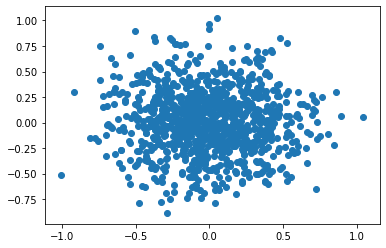

In [8]:
X = np.load("./data.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

The dataset contains 1000 4-dimensional samples. However, we don't know how many centroids it contains. The number of centroids is more than 5 but less than 10. We need to figure it out in the clustering procedure.

-----

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

If each of your samples, such as the 400 you generated in the previous question, are of dimension $n$, then each of your centroids will be of dimension $n$.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

---

**TASK 2.1:** Write a function $initialise\_parameters(m, n, X) = C$ which generates $m$ centroids, each of dimension $n$, and stores them in a matrix $C \in \mathbb{R}^{m \times n}$.

No two centroids should be the same, and **must not** be hard coded. Generate these parameters using a sensible initialisation method such as those described in the first link below. You will be judged based on whether the method you choose is sensible and likely to result in kmeans converging to good result.

---

**HINT:** 
- https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

In [9]:
def Finding_New_Centroid(X, Current_Centroids):
    Furthest_Point = -99
    Furthest_Index = 0

    i = 0
    while i < len(X):
        Current_Data_Point = X[i]
        
        if Current_Data_Point not in Current_Centroids:
            Shortest_Distance_From_Chosen_Centroids = np.sqrt(sum((Current_Data_Point - Current_Centroids[0]) ** 2))
            
            for k in range(len(Current_Centroids)):
                Each_Distance = np.sqrt(sum((Current_Data_Point - Current_Centroids[k]) ** 2))
                if Each_Distance < Shortest_Distance_From_Chosen_Centroids:
                    Shortest_Distance_From_Chosen_Centroids = Each_Distance 
            
            if Shortest_Distance_From_Chosen_Centroids > Furthest_Point:
                Furthest_Point = Shortest_Distance_From_Chosen_Centroids
                Furthest_Index = i
            
        i += 1
    
    New_Centroid = X[Furthest_Index]
    return New_Centroid

In [10]:
def initialise_parameters(m, n, X):
    C = np.zeros((m,n))
    
    X_copy = [row for row in X]
    np.random.shuffle(X_copy)
    C[0] = X_copy[0]
    
    for i in range(0, m-1):
        New_Centroid = Finding_New_Centroid(X, C)
        C[i+1] = New_Centroid
    
    return C

C = initialise_parameters(2, 4, X)
print(C)

[[-0.08215101  0.11568247  1.0679666  -0.50048716]
 [ 0.25613997  0.22100056 -2.0508867  -2.44353477]]


Now we implement k-means.

---
   **TASK 2.2:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

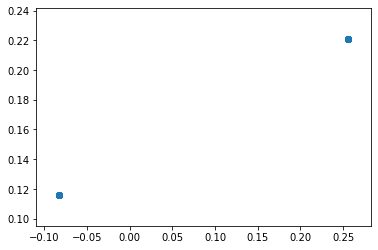

In [11]:
def E_step(C, X):
    L = np.zeros(X.shape)
    
    for i in range(len(X)):
        Current_Data_Point = X[i]
        Minimum_Distance = np.sqrt(sum((Current_Data_Point - C[0]) ** 2))
        
        #Minimum_Distance = np.linalg.norm(Current_Data_Point - C[0])**2
        Closest_Centroid = C[0]
        
        for k in range(len(C)):
            Each_Distance = np.sqrt(sum((Current_Data_Point - C[k]) ** 2))
            #Each_Distance = np.linalg.norm(Current_Data_Point - C[k])**2
            
            if Each_Distance < Minimum_Distance:
                Minimum_Distance = Each_Distance
                Closest_Centroid = C[k]

        L[i] = Closest_Centroid
  
    return L

L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

---

**TASK 2.3:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [12]:
def find_index(array_to_locate, original_list):
    for i in range(len(original_list)):
        Found = np.array_equal(array_to_locate, original_list[i])
        if Found:
            return i
    return None

In [13]:
def M_step(C, X, L):
    Clusters = {}

    for i in range(len(X)):
        Current_Data_Point = X[i]
        Corresponding_Closest_Centroid = L[i]
        Index_in_Centroid_List = find_index(Corresponding_Closest_Centroid, C)
        
        if Index_in_Centroid_List not in Clusters:
            Clusters[Index_in_Centroid_List] = [Current_Data_Point]
        else:
            Clusters[Index_in_Centroid_List].append(Current_Data_Point)

    Updated_Centroids = []
    for k in Clusters:
        Current_Cluster = Clusters[k]
        New_Centroid = sum(Current_Cluster) / len(Current_Cluster)
        Updated_Centroids.append(New_Centroid)
        
    return np.array(Updated_Centroids)

M_step(C, X, L)

array([[-0.0175371 ,  0.01617017,  0.27377394,  0.26137019],
       [ 0.03002494, -0.02453016, -1.69922178, -1.60831411]])

---
**TASK 2.4:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---

In [14]:
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = np.zeros((m, X.shape[1]))
    
    Number_of_Dimensions = X.shape[1] 
    C = initialise_parameters(m, Number_of_Dimensions, X)

    for Number_of_Iteration in range(i):
        L = E_step(C, X)
        C = M_step(C, X, L)
    
    return C, L

---
**Task 2.5:** The following code is to display the result. However, due to the limitation of our visualization tools, it can only presents the data in the two dimensional space. While the dimension of the dataset is 4, we really want to visualize the data in the two dimensional figure. Besides, the number of centroids is not determined yet.

This task is ask you to modify the following code so as to give the best visualization effect. 

---
**HINT:** You only need to change "number of centroid", "dimension1", "dimension2" to a number, which are quoted by "#" in the following code. 

Initial Parameters:
[[-0.08215101  0.11568247  1.0679666  -0.50048716]
 [ 0.25613997  0.22100056 -2.0508867  -2.44353477]]

Final Parameters:
[[-3.12595827e-02  7.66544119e-03  7.32444784e-01  7.23499116e-01]
 [-2.05541611e-02 -2.94840798e-03 -7.34726213e-01  7.52580271e-01]
 [-1.61647729e-02  2.54639072e-02  1.00871817e+00 -7.26380789e-01]
 [-1.15362482e-03  3.56500354e-02 -5.02332315e-01 -7.41382419e-01]
 [ 1.80182894e-02 -2.84548382e-02 -1.73314207e+00 -1.74422749e+00]
 [-2.30938038e-02  1.71549863e-02  1.76052530e+00 -1.73716493e+00]
 [-1.08975530e-02  1.26213183e-02 -2.01514271e+00  1.74712290e+00]
 [-2.68311120e-03  1.72757846e-02  1.49565927e+00  1.75278340e+00]]


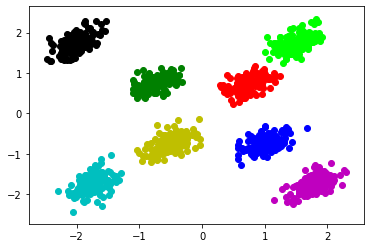

In [15]:
m = 8 #number of centroid
i = 100
#CODE TO DISPLAY YOUR RESULTS.
C_final, L_final = kmeans(X, m, i)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'lime', 'wheat', 'fuchsia', 'pink']
for i in range(m):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,2], #dimension1
                cluster[:,3], #dimension2
                c=colours[i])
plt.show()

---
**TASK 2.6:** Use your own words to explain how you found the number of centroids in Task 2.5 and how you might do this in the real world.

---

In [16]:
def Training_Loss(X, Final_Assignment, Final_Centroids):
    Loss = []
    i = 0
    while i < len(X):
        Current_Data_Point = X[i]
        Corresponding_Closest_Centroid = Final_Assignment[i]
        Distance = np.sqrt(sum((Current_Data_Point - Corresponding_Closest_Centroid) ** 2))
        Loss.append(Distance)
        i += 1
    return sum(Loss)

In [19]:
Number_of_Clusters_List = np.arange(6, 10, 1)

Loss_List = []

for Number_of_Clusters in Number_of_Clusters_List:
    Number_of_Iteration = 100
    Final_Centroids, Final_Assignment = kmeans(X, Number_of_Clusters, Number_of_Iteration)
   
    Each_Training_Loss = Training_Loss(X, Final_Assignment, Final_Centroids)
    Loss_List.append(Each_Training_Loss)
    

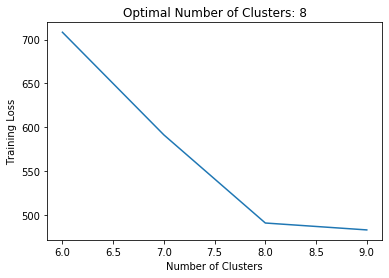

In [20]:
plt.plot(Number_of_Clusters_List, Loss_List)
plt.xlabel('Number of Clusters')
plt.ylabel('Training Loss')
plt.title('Optimal Number of Clusters: 8')
plt.show()

## Explainations

- I have calculated the training loss for each number of clusters ranging from 6 to 9. Upon the above visualisations I have decided to select the value of the number of cluster at the elbow: utilizing the elbow method. This agrees with the visualisation, in task 2.5, henceforth, we conclude that, 8 cluster is the optimal cluster for the given data set. 
- In Real World, stakes are higher, therefore clustering is a matter of precision, and granularity of a quality decision making. Adding more data points would probably increase or decrease the number of clusters, because we can see that the clusters have sporadic data points, those points could be belonging to a different cluster; the question arises: is the cluster a true representation of the case in hand, meaning does it support the initial presumption about the real world? If it is a true representation of the real world, then it means we must investigate the sporadic points, as they have clear differences (as distance) from the centroid.

- Nonetheless, the path to the optimal clustering is a matter of realising new insight, update current iteration, and repeat that process for reaching the optimal K(clusters). Given that real world is complex and dynamical(always changes), and so is tools that describe the real world also changing; and techniques like Elbow Method, Silhouette clustering and many other tools combined may help draw a near-precise picture(clusters) of real world. 